## 导入需要的模块和库 

In [1]:
from sklearn.linear_model import LinearRegression as LR 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import fetch_california_housing as fch 
import pandas as pd 

## 导入数据 探索数据

In [2]:
housevalue = fch() 

In [3]:
X = pd.DataFrame(housevalue.data) 
y = housevalue.target 
X.shape, y.shape 

((20640, 8), (20640,))

In [4]:
X.head() 

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
X.columns = housevalue.feature_names 

In [7]:
X.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 分训练集和测试集 

In [8]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.3,random_state=420) 
# 重新整理索引 
for i in [Xtrain, Xtest]: 
    i.index = range(i.shape[0]) 


In [9]:
# 输出训练集和测试集的大小 
print('Xtrain shape is:', Xtrain.shape) 
print('Xtest shape is: ',Xtest.shape) 
print('Ytrain shape is: ',Ytrain.shape) 
print('Ytest shape is: ',Ytest.shape) 

Xtrain shape is: (14448, 8)
Xtest shape is:  (6192, 8)
Ytrain shape is:  (14448,)
Ytest shape is:  (6192,)


## 建模 

In [10]:
reg = LR().fit(Xtrain,Ytrain) 
yhat = reg.predict(Xtest) 
yhat 

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [11]:
[*zip(Xtrain.columns,reg.coef_)] 

[('MedInc', 0.4373589305968405),
 ('HouseAge', 0.010211268294494077),
 ('AveRooms', -0.10780721617317687),
 ('AveBedrms', 0.6264338275363769),
 ('Population', 5.216125353157005e-07),
 ('AveOccup', -0.0033485096463335183),
 ('Latitude', -0.41309593789477167),
 ('Longitude', -0.42621095362084743)]

In [12]:
reg.intercept_

-36.256893229203925

In [20]:
# 模型在测试集上的表现 
from sklearn.metrics import mean_squared_error as MSE 
MSE(yhat,Ytest) 

0.5309012639324571

In [21]:
# 模型在训练集上的表现 
# 是否存在过拟合现象 
yhat_train = reg.predict(Xtrain) 
MSE(yhat_train,Ytrain) 

0.52185226625331

In [14]:
y.max(),y.min() 

(5.00001, 0.14999)

In [17]:
-1* cross_val_score(reg,X,y,cv = 10, scoring = 'neg_mean_squared_error').mean()  

0.5509524296956604

## 调用R2 score 

In [24]:
from sklearn.metrics import r2_score 
r2_score(Ytest,yhat) 

0.6043668160178817

In [23]:
r2 = reg.score(Xtest,Ytest) 
r2 

0.6043668160178817

## 可视化拟合情况 

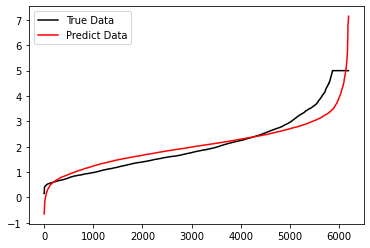

In [25]:
import matplotlib.pyplot as plt 

plt.plot(range(len(Ytest)),sorted(Ytest),c='black',label = 'True Data') 
plt.plot(range(len(yhat)),sorted(yhat),c = 'red',label = 'Predict Data') 
plt.legend() 
plt.show() 

## Ridge Regression 

In [26]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge, LinearRegression,Lasso 
from sklearn.model_selection import train_test_split as TTS 
import matplotlib.pyplot as plt 

In [29]:
reg = Ridge(alpha = 1).fit(Xtrain,Ytrain) 
reg.score(Xtest,Ytest) 

0.604361035231228

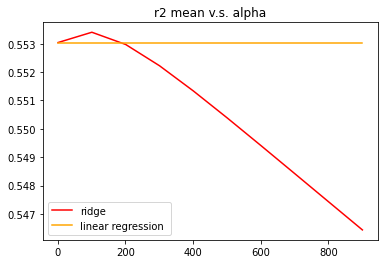

In [34]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化 
alpharange = np.arange(1,1001,100) 
ridge,lr = [],[] 
for alpha in alpharange: 
    reg = Ridge(alpha = alpha) 
    linear = LR() 
    regs = cross_val_score(reg,X,y,cv = 5, scoring = 'r2').mean() 
    linears = cross_val_score(linear,X,y,cv = 5, scoring = 'r2' ).mean() 
    ridge.append(regs) 
    lr.append(linears) 
plt.plot(alpharange,ridge, color = 'red',label = 'ridge') 
plt.plot(alpharange,lr,color = 'orange',label = 'linear regression ') 
plt.title('r2 mean v.s. alpha') 
plt.legend() 
plt.show() 

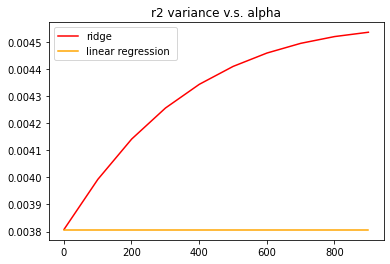

In [33]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化 
alpharange = np.arange(1,1001,100) 
ridge,lr = [],[] 
for alpha in alpharange: 
    reg = Ridge(alpha = alpha) 
    linear = LR() 
    regs = cross_val_score(reg,X,y,cv = 5, scoring = 'r2').var() 
    linears = cross_val_score(linear,X,y,cv = 5, scoring = 'r2' ).var() 
    ridge.append(regs) 
    lr.append(linears) 
plt.plot(alpharange,ridge, color = 'red',label = 'ridge') 
plt.plot(alpharange,lr,color = 'orange',label = 'linear regression ') 
plt.title('r2 variance v.s. alpha') 
plt.legend() 
plt.show() 

### 用RidgreCV 来选择最佳的正则化系数 

In [37]:
from sklearn.linear_model import RidgeCV, LinearRegression 
Ridge_ = RidgeCV(alphas =np.arange(1,1001,100), store_cv_values = True).fit(X,y)  
# 无关交叉验证的Ridge Regression 结果
Ridge_.score(X,y) 

0.6060251767338423

In [38]:
# 进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis = 0) 

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [39]:
# 查看被选择出来的最佳正则化系数 
Ridge_.alpha_

101

## 用Lasso Regression 来做特征选择 

In [40]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()


[43.73589305968405,
 1.0211268294494078,
 -10.780721617317687,
 62.64338275363769,
 5.2161253531570044e-05,
 -0.33485096463335184,
 -41.30959378947717,
 -42.621095362084745]

In [41]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()


[43.735893059683974,
 1.021126829449408,
 -10.78072161731756,
 62.64338275363725,
 5.216125353268044e-05,
 -0.33485096463335795,
 -41.30959378947714,
 -42.62109536208472]

In [42]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

C:\Users\CHENGS~1\AppData\Local\Temp/ipykernel_10732/1596196289.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
c:\Users\Chengsheng Deng\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Chengsheng Deng\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769.86077141391, tolerance: 1.917255476913148
  model = cd_fast.enet_coordinate_descent(


[43.73589305968403,
 1.0211268294494045,
 -10.780721617317676,
 62.643382753637844,
 5.2161253532657214e-05,
 -0.33485096463335784,
 -41.309593789477184,
 -42.621095362084766]

In [43]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[40.105683718344864,
 1.0936292607860145,
 -3.742376361024461,
 26.524037834897218,
 0.0003525368511503955,
 -0.32071293948877966,
 -40.06483047344841,
 -40.81754399163313]

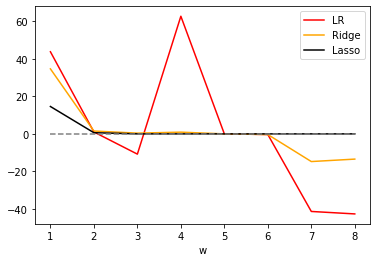

In [44]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

### 用LassoCV 选取最佳的正则化参数取值 

In [45]:
from sklearn.linear_model import LassoCV 
alpharange = np.logspace(-10,-2,200,base = 10) 

lasso_ = LassoCV(alphas= alpharange
                ,cv = 5 ).fit(Xtrain,Ytrain) 
                

In [46]:
#查看被选择出来的最佳正则化系数
lasso_.alpha_ 

0.0020729217795953697

In [47]:
#调用所有交叉验证的结果
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [48]:
lasso_.mse_path_.mean(axis=1)

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [49]:
#最佳正则化系数下获得的模型的系数结果
lasso_.coef_


array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [50]:
lasso_.score(Xtest,Ytest)


0.6038982670571436

In [51]:
#与线性回归相比如何？
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)


0.6043668160178817

In [52]:
#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001
,n_alphas=300
,cv=5
).fit(Xtrain, Ytrain)


In [53]:
ls_.alpha_


0.0020954551690628535

In [54]:
ls_.alphas_ #查看所有自动生成的alpha取值


array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [55]:
ls_.alphas_.shape


(300,)

In [56]:
ls_.score(Xtest,Ytest)


0.60389154238192

In [57]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])